In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\wnsgo\\Desktop\\Fastcampus\\Part 05~11) Machine Learning\\06. 회귀분석\\실습코드'

In [6]:
# 데이터 불러오기
corolla = pd.read_csv("ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


## 범주형 변수를 이진형 변수로 변환

In [8]:
## 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [9]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [11]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [12]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

In [13]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [14]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [15]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [16]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [17]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [18]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [19]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [20]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     323.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:13:29   Log-Likelihood:                -8444.0
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -276.0922    130.803     -2.111      0.035    -532.782     -19.402
Age_08_04         -108.7101      4.081    -26.639      0.000    -116.718    -100.702
Airbag_1            34.7767    265.866      0.131      0.896    -486.962     556.515
Airbag_2            13.8573    134.819      0.103      0.918    -250.713     278.427
Airco              215.4384     93.344      2.308      0.021      32.259     398.618
Automatic          300.3057    164.983      1.820      0.069     -23.458     624.069
Automatic_airco   2278.9168    199.870     11.402      0.000    1886.690    2671.144
BOVAG_Guarantee    505.1899    132.074      3.825      0.000     246.007     764.372
Backseat_Divider  -327.0501    135.938     -2.406      0.016    -593.817     -60.283
Boardcomputer     -140.1261    125.056     -1.121      0.263    -385.537     105.284
CD_Player          233.2085    105.225      2.216      0.027      26.714     439.702
CNG              -1071.9487    242.087     -4.428      0.000   -1547.023    -596.875
Central_Lock       -26.4325    157.125     -0.168      0.866    -334.776     281.911
Cylinders           -0.0374      0.002    -15.677      0.000      -0.042      -0.033
Diesel            -493.0902    207.621     -2.375      0.018    -900.528     -85.652
Doors              -54.7100     42.566     -1.285      0.199    -138.242      28.822
Gears              229.0456    209.498      1.093      0.275    -182.076     640.167
Guarantee_Period    72.5133     13.889      5.221      0.000      45.258      99.769
HP                  12.8184      3.825      3.351      0.001       5.312      20.324
KM                  -0.0168      0.001    -12.398      0.000      -0.019      -0.014
Met_Color           27.8084     79.666      0.349      0.727    -128.529     184.145
Metallic_Rim       226.2975     98.256      2.303      0.021      33.480     419.115
Mfg_Month          -81.6494     10.651     -7.666      0.000    -102.551     -60.748
Mfg_Year            -2.8837      0.930     -3.100      0.002      -4.709      -1.058
Mfr_Guarantee      196.4731     77.512      2.535      0.011      44.362     348.584
Mistlamps          -92.6871    112.532     -0.824      0.410    -313.520     128.146
Petrol            1565.0296    202.718      7.720      0.000    1167.214    1962.845
Power_Steering     206.7527    285.428      0.724      0.469    -353.375     766.880
Powered_Windows    363.7976    155.653      2.337      0.020      58.342     669.253
Quarterly_Tax       15.1943      1.903      7.984      0.000      11.459      18.929
Radio              554.4402    799.013      0.694      0.488   -1013.552    2122.432
Radio_cassette    -645.8013    799.894     -0.807      0.420   -2215.521     923.919
Sport_Model        228.6089     94.536      2.418      0.016      43.090     414.127
Tow_Bar           -267.

## VIF를 통한 다중공선성 확인 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\wnsgo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\wnsgo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


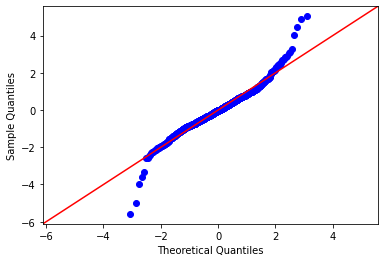

In [22]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid  # residual
pred_y=fitted_full_model.predict(train_x)
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

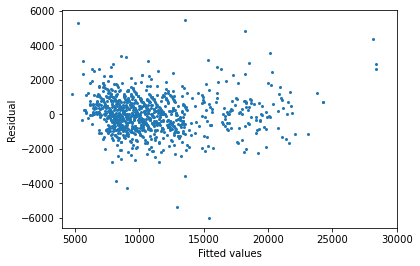

In [23]:
# residual pattern 확인
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [24]:
pred_y=fitted_full_model.predict(test_x) ## 검증 데이터에 대한 예측 

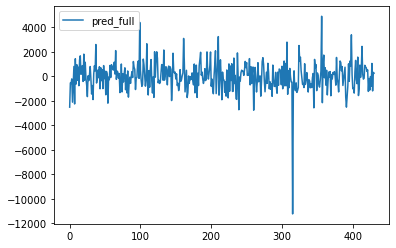

In [25]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y),label="pred_full")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
## MSE 성능
mean_squared_error(y_true= test_y, y_pred= pred_y)

1411886.6538709472

# 변수선택법

In [28]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF4287070>, 'AIC': 19126.168292087626}


In [29]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x24ff42dffa0>,
 'AIC': 16955.918526183763}

In [30]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.873967170715332 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17595.038752
Name: 211, dtype: object


In [31]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [32]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.07198643684387207 seconds.
Processed  630 models on 2 predictors in 0.8289742469787598 seconds.
Processed  7140 models on 3 predictors in 11.592634677886963 seconds.
Total elapsed time: 12.725586652755737 seconds.


In [33]:
models

,AIC,model
1,17877.346297,<statsmodels.regression.linear_model.Regressio...
2,17595.038752,<statsmodels.regression.linear_model.Regressio...
3,17380.411458,<statsmodels.regression.linear_model.Regressio...


In [34]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2135.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:14:44   Log-Likelihood:                -8686.2
No. Observations:                1005   AIC:                         1.738e+04
Df Residuals:                    1001   BIC:                         1.740e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0256      0.001    -18.200      0.000      -0.028      -0.023
Mfg_Year    1424.7800     38.330     37.172      0.000    1349.564    1499.996
Weight        21.1363      0.972     21.751      0.000      19.229      23.043
const      -2.859e+06   7.61e+04    -37.548      0.000   -3.01e+06   -2.71e+06
==============================================================================
Omnibus:                      217.602   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2123.941
Skew:                          -0.693   Prob(JB):                         0.00
Kurtosis:                       9.986   Cond. No.                     1.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91654
full model AIC:  16955.91853
full model MSE:  13941199.91119
selected model Rsquared:  0.86484
selected model AIC:  17380.41146
selected model MSE:  13941199.91119


Text(0, 0.5, 'BIC')

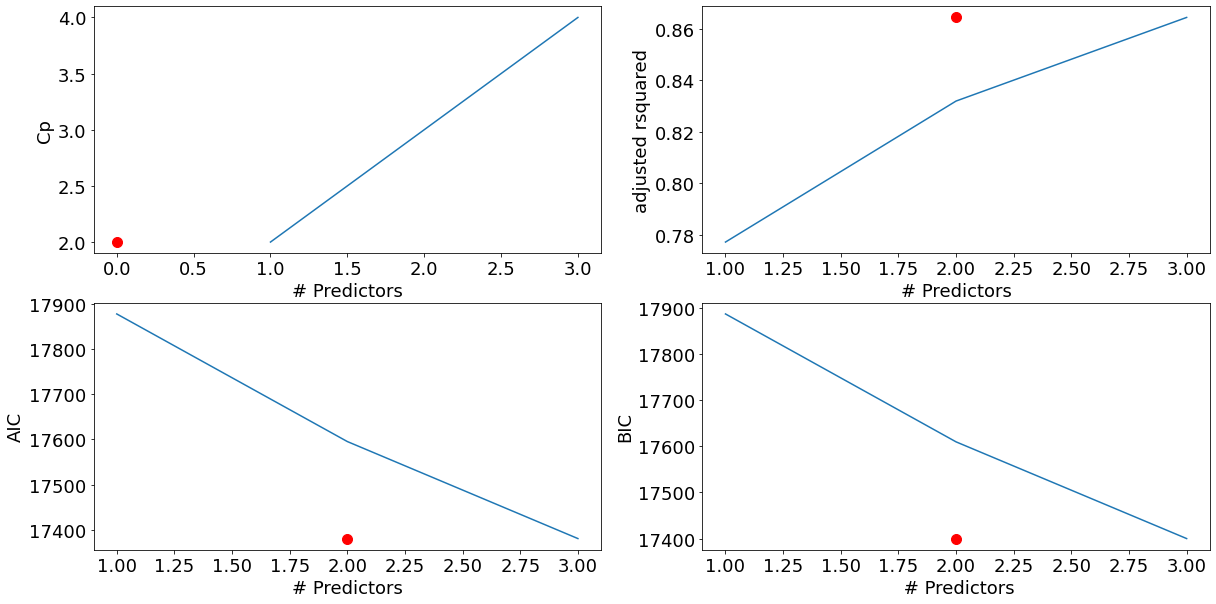

In [36]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [37]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [38]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [39]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.06199812889099121
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62D1BB0>
Processed  35 models on 2 predictors in 0.05199694633483887
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62FCEE0>
Processed  34 models on 3 predictors in 0.042998313903808594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62FC3A0>
Processed  33 models on 4 predictors in 0.05499887466430664
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62E6730>
Processed  32 models on 5 predictors in 0.07499837875366211
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM

In [40]:
Forward_best_model.aic

16940.670141915303

In [41]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     486.6
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:15:54   Log-Likelihood:                -8447.3
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     982   BIC:                         1.705e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1273.4942     39.498     32.242      0.000    1195.985    1351.004
Automatic_airco   2230.3796    186.474     11.961      0.000    1864.446    2596.313
KM                  -0.0170      0.001    -12.672      0.000      -0.020      -0.014
Weight              16.9073      1.426     11.858      0.000      14.109      19.705
HP                  13.3427      3.674      3.632      0.000       6.133      20.552
Powered_Windows    324.0971     86.215      3.759      0.000     154.910     493.284
BOVAG_Guarantee    518.8612    128.921      4.025      0.000     265.869     771.854
Guarantee_Period    73.7856     13.481      5.473      0.000      47.330     100.241
Quarterly_Tax       15.0223      1.834      8.191      0.000      11.423      18.621
Petrol            2616.8175    387.004      6.762      0.000    1857.367    3376.268
Tow_Bar           -262.7976     81.136     -3.239      0.001    -422.018    -103.577
Mfg_Month           23.9376     10.545      2.270      0.023       3.245      44.630
CD_Player          233.7896     99.438      2.351      0.019      38.654     428.925
Metallic_Rim       240.2673     93.152      2.579      0.010      57.468     423.066
ABS               -256.9299    103.030     -2.494      0.013    -459.115     -54.745
Sport_Model        286.9621     89.592      3.203      0.001     111.149     462.776
Backseat_Divider  -335.8295    119.574     -2.809      0.005    -570.480    -101.179
Mfr_Guarantee      192.5020     76.143      2.528      0.012      43.080     341.924
Airco              203.8878     88.874      2.294      0.022      29.483     378.292
Doors              -54.6267     41.648     -1.312      0.190    -136.356      27.103
Automatic          277.2436    162.101      1.710      0.088     -40.860     595.347
Diesel             599.2722    392.594      1.526      0.127    -171.148    1369.692
const            -2.559e+06   7.87e+04    -32.514      0.000   -2.71e+06    -2.4e+06
==============================================================================
Omnibus:                       90.376   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.309
Skew:                           0.152   Prob(JB):                    8.41e-110
Kurtosis:                       6.450   Cond. No.                     1.77e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [42]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [43]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [44]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.14299464225769043
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6EC8EE0>
Processed  35 models on 34 predictors in 0.14899539947509766
Selected predictors: ['ABS', 'Age_08_04', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg

Selected predictors: ['ABS', 'Age_08_04', 'Airco', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'CD_Player', 'CNG', 'Diesel', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfr_Guarantee', 'Powered_Windows', 'Quarterly_Tax', 'Sport_Model', 'Tow_Bar', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62D1F40>
Total elapsed time: 1.7009458541870117 seconds.


In [45]:
Backward_best_model.aic

16940.429247144828

# 단계적 선택법

In [46]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [47]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.03999829292297363
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6EC8C70>
forward
Processed  1 models on 0 predictors in 0.0029997825622558594
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6EC1AF0>
Processed  35 models on 2 predictors in 0.053998470306396484
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6ED0EE0>
forward
Processed  2 models on 1 predictors in 0.00500035285949707
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62D17F0>
Processed  34 models on 3 predictors in 0.04099726676940918
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.R

forward
Processed  15 models on 14 predictors in 0.06199908256530762
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfg_Month', 'Metallic_Rim', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6ED8E50>
Processed  21 models on 16 predictors in 0.05900144577026367
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'ABS', 'Sport_Model', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6ED0130>
forward
Processed  16 models on 15 predictors in 0.03699922561645508
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_T

Processed  23 models on 22 predictors in 0.07200145721435547
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Airco', 'Automatic', 'Diesel', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6EC8F70>
backward
Processed  14 models on 23 predictors in 0.044998884201049805
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Airco', 'Automatic', 'Diesel', 'Cylinders', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62F44F0>
forward

Processed  23 models on 22 predictors in 0.09999871253967285
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Airco', 'Automatic', 'Diesel', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FA6ED8E50>
backward
Processed  14 models on 23 predictors in 0.037000179290771484
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'Mfg_Month', 'CD_Player', 'Metallic_Rim', 'ABS', 'Sport_Model', 'Backseat_Divider', 'Mfr_Guarantee', 'Airco', 'Automatic', 'Diesel', 'Cylinders', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024FF62F4610>
forward

In [48]:
Stepwise_best_model.aic

16940.4292471448

# 성능평가 

In [49]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (22,) (23,)


In [50]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [51]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [53]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD       BACKWARD       STEPWISE
MSE   1411886.653871  1410291.716919  1387110.32125  1387110.32125
RMSE     1188.228368     1187.557037    1177.756478    1177.756478
MAE       840.315183      846.503594     844.177062     844.177062
MAPE        8.384994        8.458288       8.443193       8.443193


In [54]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
23
22
23


In [55]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     323.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:16:35   Log-Likelihood:                -8444.0
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -276.0922    130.803     -2.111      0.035    -532.782     -19.402
Age_08_04         -108.7101      4.081    -26.639      0.000    -116.718    -100.702
Airbag_1            34.7767    265.866      0.131      0.896    -486.962     556.515
Airbag_2            13.8573    134.819      0.103      0.918    -250.713     278.427
Airco              215.4384     93.344      2.308      0.021      32.259     398.618
Automatic          300.3057    164.983      1.820      0.069     -23.458     624.069
Automatic_airco   2278.9168    199.870     11.402      0.000    1886.690    2671.144
BOVAG_Guarantee    505.1899    132.074      3.825      0.000     246.007     764.372
Backseat_Divider  -327.0501    135.938     -2.406      0.016    -593.817     -60.283
Boardcomputer     -140.1261    125.056     -1.121      0.263    -385.537     105.284
CD_Player          233.2085    105.225      2.216      0.027      26.714     439.702
CNG              -1071.9487    242.087     -4.428      0.000   -1547.023    -596.875
Central_Lock       -26.4325    157.125     -0.168      0.866    -334.776     281.911
Cylinders           -0.0374      0.002    -15.677      0.000      -0.042      -0.033
Diesel            -493.0902    207.621     -2.375      0.018    -900.528     -85.652
Doors              -54.7100     42.566     -1.285      0.199    -138.242      28.822
Gears              229.0456    209.498      1.093      0.275    -182.076     640.167
Guarantee_Period    72.5133     13.889      5.221      0.000      45.258      99.769
HP                  12.8184      3.825      3.351      0.001       5.312      20.324
KM                  -0.0168      0.001    -12.398      0.000      -0.019      -0.014
Met_Color           27.8084     79.666      0.349      0.727    -128.529     184.145
Metallic_Rim       226.2975     98.256      2.303      0.021      33.480     419.115
Mfg_Month          -81.6494     10.651     -7.666      0.000    -102.551     -60.748
Mfg_Year            -2.8837      0.930     -3.100      0.002      -4.709      -1.058
Mfr_Guarantee      196.4731     77.512      2.535      0.011      44.362     348.584
Mistlamps          -92.6871    112.532     -0.824      0.410    -313.520     128.146
Petrol            1565.0296    202.718      7.720      0.000    1167.214    1962.845
Power_Steering     206.7527    285.428      0.724      0.469    -353.375     766.880
Powered_Windows    363.7976    155.653      2.337      0.020      58.342     669.253
Quarterly_Tax       15.1943      1.903      7.984      0.000      11.459      18.929
Radio              554.4402    799.013      0.694      0.488   -1013.552    2122.432
Radio_cassette    -645.8013    799.894     -0.807      0.420   -2215.521     923.919
Sport_Model        228.6089     94.536      2.418      0.016      43.090     414.127
Tow_Bar           -267.

In [56]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     509.3
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:16:35   Log-Likelihood:                -8448.2
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     983   BIC:                         1.705e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1276.9098     39.426     32.387      0.000    1199.541    1354.279
Automatic_airco   2250.7551    185.894     12.108      0.000    1885.960    2615.550
KM                  -0.0171      0.001    -12.829      0.000      -0.020      -0.015
Weight              16.1411      1.301     12.406      0.000      13.588      18.694
HP                  14.2776      3.605      3.960      0.000       7.203      21.352
Powered_Windows    329.4615     86.150      3.824      0.000     160.403     498.520
BOVAG_Guarantee    513.9809    128.915      3.987      0.000     261.002     766.960
Guarantee_Period    72.9958     13.473      5.418      0.000      46.557      99.434
Quarterly_Tax       14.8430      1.830      8.113      0.000      11.253      18.433
Petrol            2567.9072    385.345      6.664      0.000    1811.715    3324.100
Tow_Bar           -272.8829     80.801     -3.377      0.001    -431.445    -114.321
Mfg_Month           23.5940     10.545      2.237      0.025       2.900      44.288
CD_Player          232.1899     99.467      2.334      0.020      36.998     427.382
Metallic_Rim       249.1910     92.937      2.681      0.007      66.814     431.568
ABS               -272.5487    102.378     -2.662      0.008    -473.452     -71.645
Sport_Model        310.8977     87.746      3.543      0.000     138.707     483.088
Backseat_Divider  -329.0820    119.507     -2.754      0.006    -563.601     -94.563
Mfr_Guarantee      187.5949     76.079      2.466      0.014      38.299     336.891
Airco              192.1859     88.457      2.173      0.030      18.599     365.773
Automatic          296.9080    161.465      1.839      0.066     -19.948     613.764
Diesel             673.7394    388.610      1.734      0.083     -88.860    1436.339
Cylinders        -6.035e+05   1.85e+04    -32.642      0.000    -6.4e+05   -5.67e+05
const            -1.509e+05   4622.069    -32.642      0.000    -1.6e+05   -1.42e+05
==============================================================================
Omnibus:                       87.693   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.806
Skew:                           0.190   Prob(JB):                     1.56e-97
Kurtosis:                       6.241   Cond. No.                     9.44e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""